In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2th scenario

In [2]:
df=pd.read_excel('bank_all_senario.xlsx',sheet_name='3th_scenario')
print(df)

      Unnamed: 0  IsActiveMember2  HasCrCard2  Exited2  Geography2  Gender2  \
0              0                0           0        0           1        0   
1              1                0           0        0           1        0   
2              2                0           0        0           1        0   
3              3                0           0        0           1        0   
4              4                0           0        0           1        0   
...          ...              ...         ...      ...         ...      ...   
9995        9995                1           1        0           1        1   
9996        9996                1           1        0           1        1   
9997        9997                1           1        0           1        1   
9998        9998                1           1        0           1        1   
9999        9999                1           1        0           1        1   

      Tenure2  NomOfProducts2  Balance2  CreditScor

In [3]:
df_copy=df.copy(deep=True)

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        10000 non-null  int64
 1   IsActiveMember2   10000 non-null  int64
 2   HasCrCard2        10000 non-null  int64
 3   Exited2           10000 non-null  int64
 4   Geography2        10000 non-null  int64
 5   Gender2           10000 non-null  int64
 6   Tenure2           10000 non-null  int64
 7   NomOfProducts2    10000 non-null  int64
 8   Balance2          10000 non-null  int64
 9   CreditScore2      10000 non-null  int64
 10  Age2              10000 non-null  int64
 11  EstimatedSalary2  10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


In [5]:
target_Lable_remainstatue=[]
for i in df_copy['Tenure2']:
    if i>=5:
        target_Lable_remainstatue.append(1)
    else :
        target_Lable_remainstatue.append(0)

df_copy['target_Lable_remainstatue']=target_Lable_remainstatue


df_copy

,Unnamed: 0,IsActiveMember2,HasCrCard2,Exited2,Geography2,Gender2,Tenure2,NomOfProducts2,Balance2,CreditScore2,Age2,EstimatedSalary2,target_Lable_remainstatue
0,0,0,0,0,1,0,0,0,0,850,45,171388,0
1,1,0,0,0,1,0,0,0,0,850,34,127408,0
2,2,0,0,0,1,0,0,0,0,850,41,27736,0
3,3,0,0,0,1,0,0,0,0,850,39,153563,0
4,4,0,0,0,1,0,0,0,0,850,41,29512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1,1,0,1,1,2,1,77200,658,45,155862,0
9996,9996,1,1,0,1,1,2,1,76541,653,38,162587,0
9997,9997,1,1,0,1,1,2,1,76370,680,43,129868,0
9998,9998,1,1,0,1,1,2,1,77163,645,39,183123,0


In [6]:
int_Gender2=[]
for i in df_copy['Gender2']:
    if i==0:
        int_Gender2.append(1)
    elif i==1:
        int_Gender2.append(2)

df_copy['int_Gender2']=int_Gender2
df_copy=df_copy.drop(['Gender2'],axis=1)

df_copy

,Unnamed: 0,IsActiveMember2,HasCrCard2,Exited2,Geography2,Tenure2,NomOfProducts2,Balance2,CreditScore2,Age2,EstimatedSalary2,target_Lable_remainstatue,int_Gender2
0,0,0,0,0,1,0,0,0,850,45,171388,0,1
1,1,0,0,0,1,0,0,0,850,34,127408,0,1
2,2,0,0,0,1,0,0,0,850,41,27736,0,1
3,3,0,0,0,1,0,0,0,850,39,153563,0,1
4,4,0,0,0,1,0,0,0,850,41,29512,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1,1,0,1,2,1,77200,658,45,155862,0,2
9996,9996,1,1,0,1,2,1,76541,653,38,162587,0,2
9997,9997,1,1,0,1,2,1,76370,680,43,129868,0,2
9998,9998,1,1,0,1,2,1,77163,645,39,183123,0,2


# loyalty

## logistic regression 

## loyalty prediction based on "target_Lable_remainstatue"

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
features = ['CreditScore2','Age2','Tenure2','Balance2','NomOfProducts2','HasCrCard2','IsActiveMember2','EstimatedSalary2','Geography2','int_Gender2']
target = 'target_Lable_remainstatue'

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_copy[features], df_copy[target], test_size=0.30, random_state=42)

In [10]:
model = LogisticRegression()

In [11]:
logistic_classifier=model.fit(X_train, y_train)

In [12]:
### prediction

In [13]:
predictions = model.predict(X_test)

In [14]:
y_test=y_test.to_frame('real')

In [15]:
y_test['prediction']=predictions

In [16]:
y_test

,real,prediction
6252,1,1
4684,1,1
1731,0,0
4742,1,1
4521,1,1
...,...,...
8014,1,1
1074,0,0
3063,0,0
6487,1,1


In [17]:
y_train_pred=model.predict(X_train)
y_train_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [18]:
y_train=y_train.to_frame('real')
y_train['prediction']=y_train_pred
y_train

,real,prediction
9069,1,1
2603,0,0
7738,1,1
1579,0,0
5058,1,1
...,...,...
5734,1,1
5191,1,1
5390,1,1
860,0,0


In [19]:
#concat two prediction table 
loyalty_1th=pd.concat([y_train['prediction'],y_test['prediction']], axis=0)
loyalty_1th

9069    1
2603    0
7738    1
1579    0
5058    1
       ..
8014    1
1074    0
3063    0
6487    1
4705    1
Name: prediction, Length: 10000, dtype: int64

### 1st method: 5-Fold validation

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [21]:
xval = KFold(n_splits=5)
allTrainAcc, allTestAcc = [], []
for t_idx, v_idx in xval.split(df_copy[features], df_copy[target]):
    # Split dataset into two pieces
    train_df_copy = df_copy.iloc[t_idx].copy()
    test_df_copy = df_copy.iloc[v_idx].copy()
    # Train the model
    model = LogisticRegression()
    model.fit(train_df_copy[features], train_df_copy[target])
    # Calculate accuracy
    train_df_copy['prediction'] = model.predict(train_df_copy[features])
    test_df_copy['prediction'] = model.predict(test_df_copy[features])
    trainingAccuracy = mean_squared_error(train_df_copy[target], train_df_copy['prediction']) ** 0.5
    testAccuracy = mean_squared_error(test_df_copy[target], test_df_copy['prediction']) ** 0.5
    
    allTrainAcc.append(trainingAccuracy)
    allTestAcc.append(testAccuracy)
    
    print('train accuracy: {0}, test accuracy: {1}'.format(trainingAccuracy, testAccuracy))
print('avg train acc', sum(allTrainAcc) / len(allTrainAcc))
print('avg test acc', sum(allTestAcc) / len(allTestAcc))

train accuracy: 0.0, test accuracy: 0.0
train accuracy: 0.0, test accuracy: 0.5084289527554464
train accuracy: 0.0, test accuracy: 0.521536192416212
train accuracy: 0.33559648389099667, test accuracy: 0.0
train accuracy: 0.0, test accuracy: 0.0
avg train acc 0.06711929677819933
avg test acc 0.2059930290343317


### 2nd method:cross-validation

In [22]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, df_copy[features] , df_copy[target] , scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.946 (0.044)


### 3rd confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
    
y_true= y_test['real']
y_pred= y_test['prediction']

In [24]:
cm=confusion_matrix( y_true , y_pred)
cm

array([[1420,    0],
       [   0, 1580]], dtype=int64)

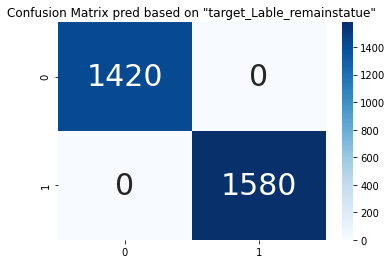

In [25]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix pred based on "target_Lable_remainstatue"')
plt.show()

In [26]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

PSA= pd.DataFrame([TPR , TNR , ACC], index=['TPR' , 'TNR' , 'ACC'] )
PSA

,0,1
TPR,1.0,1.0
TNR,1.0,1.0
ACC,1.0,1.0


## loyalty prediction based on "Exited"

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
features = ['CreditScore2','Age2','Tenure2','Balance2','NomOfProducts2','HasCrCard2','IsActiveMember2','EstimatedSalary2','Geography2','int_Gender2']
target = 'Exited2'

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_copy[features], df_copy[target], test_size=0.30, random_state=42)

In [30]:
model = LogisticRegression()

In [31]:
logistic_classifier=model.fit(X_train, y_train)

In [32]:
predictions = model.predict(X_test)

In [33]:
y_test=y_test.to_frame('real')

In [34]:
y_test['prediction']=predictions

In [35]:
y_test

,real,prediction
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
8014,1,1
1074,0,0
3063,0,0
6487,0,0


In [36]:
y_train_pred=model.predict(X_train)
y_train_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [37]:
y_train=y_train.to_frame('real')
y_train['prediction']=y_train_pred
y_train

,real,prediction
9069,1,1
2603,0,0
7738,1,1
1579,0,0
5058,0,0
...,...,...
5734,0,0
5191,0,0
5390,0,0
860,0,0


In [38]:
#concat two prediction table 
loyalty_2th=pd.concat([y_train['prediction'],y_test['prediction']], axis=0)
loyalty_2th

9069    1
2603    0
7738    1
1579    0
5058    0
       ..
8014    1
1074    0
3063    0
6487    0
4705    0
Name: prediction, Length: 10000, dtype: int64

In [39]:
## 5-Fold validation

In [40]:
### 1th method

In [41]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [42]:
xval = KFold(n_splits=5)
allTrainAcc, allTestAcc = [], []
for t_idx, v_idx in xval.split(df_copy[features], df_copy[target]):
    # Split dataset into two pieces
    train_df_copy = df_copy.iloc[t_idx].copy()
    test_df_copy = df_copy.iloc[v_idx].copy()
    # Train the model
    model = LogisticRegression()
    model.fit(train_df_copy[features], train_df_copy[target])
    # Calculate accuracy
    train_df_copy['prediction'] = model.predict(train_df_copy[features])
    test_df_copy['prediction'] = model.predict(test_df_copy[features])
    trainingAccuracy = mean_squared_error(train_df_copy[target], train_df_copy['prediction']) ** 0.5
    testAccuracy = mean_squared_error(test_df_copy[target], test_df_copy['prediction']) ** 0.5
    
    allTrainAcc.append(trainingAccuracy)
    allTestAcc.append(testAccuracy)
    
    print('train accuracy: {0}, test accuracy: {1}'.format(trainingAccuracy, testAccuracy))
print('avg train acc', sum(allTrainAcc) / len(allTrainAcc))
print('avg test acc', sum(allTestAcc) / len(allTestAcc))

train accuracy: 0.15572411502397437, test accuracy: 0.0
train accuracy: 0.15572411502397437, test accuracy: 0.4878524367060187
train accuracy: 0.15968719422671313, test accuracy: 0.0
train accuracy: 0.046097722286464436, test accuracy: 0.30903074280724885
train accuracy: 0.37181984885156416, test accuracy: 0.8561541917201597
avg train acc 0.1778105990825381
avg test acc 0.33060747424668546


In [43]:
### 2th method

In [44]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, df_copy[features], df_copy[target] , scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.980 (0.001)


In [45]:
### confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix
    
y_true= y_test['real']
y_pred= y_test['prediction']

In [47]:
cm=confusion_matrix( y_true , y_pred)
cm

array([[2223,    5],
       [  47,  725]], dtype=int64)

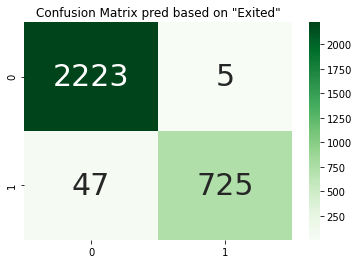

In [48]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Greens", ax = ax )
ax.set_title('Confusion Matrix pred based on "Exited"')
plt.show()

In [49]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

PSA= pd.DataFrame([TPR , TNR , ACC], index=['TPR' , 'TNR' , 'ACC'] )
PSA

,0,1
TPR,0.997756,0.939119
TNR,0.939119,0.997756
ACC,0.982667,0.982667


In [50]:
from openpyxl import load_workbook

book = load_workbook('total_pred.xlsx')
writer = pd.ExcelWriter('total_pred.xlsx', engine='openpyxl') 
writer.book = book

loyalty_1th.to_excel(writer,sheet_name='loyalty_remainstatue3')
loyalty_2th.to_excel(writer,sheet_name='loyalty_Exited3')
writer.save()

# Tenure prediction

## logistic regression 

### length of customer lifetime based on Tenure

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
features = ['CreditScore2','Age2','Balance2','NomOfProducts2','HasCrCard2','IsActiveMember2','EstimatedSalary2','Geography2','int_Gender2']
target = 'Tenure2'

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_copy[features], df_copy[target], test_size=0.30, random_state=42)

In [54]:
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [55]:
model = LogisticRegression()

In [56]:
logistic_classifier=model.fit(X_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
predictions = model.predict(X_test)

In [58]:
y_test=y_test.to_frame('real')

In [59]:
y_test['prediction']=predictions

In [60]:
y_test

,real,prediction
6252,7,6
4684,5,2
1731,2,2
4742,5,6
4521,5,5
...,...,...
8014,9,9
1074,1,2
3063,3,4
6487,7,7


In [61]:
y_train_pred=model.predict(X_train)
y_train_pred

array([9, 2, 9, ..., 6, 2, 8], dtype=int64)

In [62]:
y_train=y_train.to_frame('real')
y_train['prediction']=y_train_pred
y_train

,real,prediction
9069,10,9
2603,3,2
7738,8,9
1579,2,2
5058,5,7
...,...,...
5734,6,7
5191,5,2
5390,6,6
860,1,2


In [63]:
#concat two prediction table 
Tenure2=pd.concat([y_train['prediction'],y_test['prediction']], axis=0)
Tenure2

9069    9
2603    2
7738    9
1579    2
5058    7
       ..
8014    9
1074    2
3063    4
6487    7
4705    7
Name: prediction, Length: 10000, dtype: int64

## 5-Fold validation

### 1th method

In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [65]:
xval = KFold(n_splits=5)
allTrainAcc, allTestAcc = [], []
for t_idx, v_idx in xval.split(df_copy[features], df_copy[target]):
    # Split dataset into two pieces
    train_df_copy = df_copy.iloc[t_idx].copy()
    test_df_copy = df_copy.iloc[v_idx].copy()
    # Train the model
    model = LogisticRegression()
    model.fit(train_df_copy[features], train_df_copy[target])
    # Calculate accuracy
    train_df_copy['prediction'] = model.predict(train_df_copy[features])
    test_df_copy['prediction'] = model.predict(test_df_copy[features])
    trainingAccuracy = mean_squared_error(train_df_copy[target], train_df_copy['prediction']) ** 0.5
    testAccuracy = mean_squared_error(test_df_copy[target], test_df_copy['prediction']) ** 0.5
    
    allTrainAcc.append(trainingAccuracy)
    allTestAcc.append(testAccuracy)
    
    print('train accuracy: {0}, test accuracy: {1}'.format(trainingAccuracy, testAccuracy))
print('avg train acc', sum(allTrainAcc) / len(allTrainAcc))
print('avg test acc', sum(allTestAcc) / len(allTestAcc))

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 2.2687551652833764, test accuracy: 1.9649427472575378


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 2.244883070451555, test accuracy: 1.848377667036691


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 2.1937410968480306, test accuracy: 3.3569331241476945


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 2.632251887642974, test accuracy: 2.534363825499409
train accuracy: 1.5211837495845135, test accuracy: 3.727733896082176
avg train acc 2.17216299396209
avg test acc 2.6864702520047015


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2th method

In [66]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, df_copy[features] , df_copy[target] , scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.196 (0.006)


### confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix
    
y_true= y_test['real']
y_pred= y_test['prediction']

In [68]:
cm=confusion_matrix( y_true , y_pred)
cm

array([[ 75,   0,  50,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 286,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 450,   0,   0,   0,   0,   0,   1,   7,   0],
       [  0,   0, 120,  75,  92,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   9, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,  29,   0,   3, 154,  16, 106,   0,   0,   0],
       [  0,   0,  17,   0,   0,   4,  62, 179,   0,   0,   0],
       [  0,   0,   9,   0,   0,   8,  70, 194,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  22,  18,  39, 197,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  69, 250,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  28, 106,   0]],
      dtype=int64)

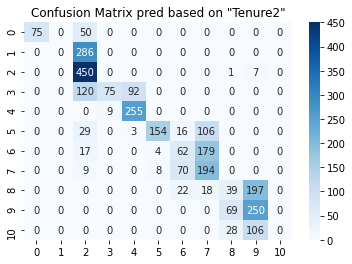

In [69]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size":10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix pred based on "Tenure2"')
plt.show()

In [70]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN) 
 
PSA= pd.DataFrame([TPR , TNR , ACC], index=['TPR' , 'TNR' , 'ACC'] )
PSA

,0,1,2,3,4,5,6,7,8,9,10
TPR,0.600000,0.000000,0.982533,0.261324,0.965909,0.500000,0.236641,0.690391,0.141304,0.783699,0.000000
TNR,1.000000,1.000000,0.798977,0.996683,0.965278,0.995542,0.960555,0.888562,0.964023,0.884372,1.000000
ACC,0.983333,0.904667,0.827000,0.926333,0.965333,0.944667,0.897333,0.870000,0.888333,0.873667,0.955333


In [71]:
from openpyxl import load_workbook

book = load_workbook('total_pred.xlsx')
writer = pd.ExcelWriter('total_pred.xlsx', engine='openpyxl') 
writer.book = book

Tenure2.to_excel(writer,sheet_name='Tenure3')
writer.save()


# classification

## LinearRegression  

### profits based on Balance

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [73]:
features = ['CreditScore2','Age2','Tenure2','NomOfProducts2','HasCrCard2','IsActiveMember2','EstimatedSalary2','Geography2','int_Gender2']
target = 'Balance2'

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_copy[features], df_copy[target], test_size=0.30, random_state=42)

In [75]:
model = LinearRegression()

In [76]:
logistic_classifier=model.fit(X_train, y_train)

In [77]:
predictions = model.predict(X_test)

In [78]:
y_test=y_test.to_frame('real')

In [79]:
y_test['prediction']=predictions

In [80]:
y_test

,real,prediction
6252,76818,80242.901140
4684,76818,82891.238901
1731,0,846.246343
4742,76787,74479.468739
4521,76557,76679.507937
...,...,...
8014,76505,76857.038154
1074,0,-2278.455478
3063,0,26741.224566
6487,76148,79831.451116


In [81]:
y_train_pred=model.predict(X_train)
y_train_pred

array([80038.03298156,  3524.61969018, 73619.89512696, ...,
       77018.70258156, -2292.55089491, 73544.88065403])

In [82]:
y_train=y_train.to_frame('real')
y_train['prediction']=y_train_pred
y_train

,real,prediction
9069,76554,80038.032982
2603,0,3524.619690
7738,76238,73619.895127
1579,0,543.706298
5058,76713,73096.626539
...,...,...
5734,76635,77121.656081
5191,76718,73648.719960
5390,76651,77018.702582
860,0,-2292.550895


In [83]:
#concat two prediction table 
profit2=pd.concat([y_train['prediction'],y_test['prediction']], axis=0)
profit2

9069    80038.032982
2603     3524.619690
7738    73619.895127
1579      543.706298
5058    73096.626539
            ...     
8014    76857.038154
1074    -2278.455478
3063    26741.224566
6487    79831.451116
4705    73121.638368
Name: prediction, Length: 10000, dtype: float64

## 5-Fold validation

### 1th method

In [84]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [85]:
xval = KFold(n_splits=5)
allTrainAcc, allTestAcc = [], []
for t_idx, v_idx in xval.split(df_copy[features], df_copy[target]):
    # Split dataset into two pieces
    train_df_copy = df_copy.iloc[t_idx].copy()
    test_df_copy = df_copy.iloc[v_idx].copy()
    # Train the model
    model = LinearRegression()
    model.fit(train_df_copy[features], train_df_copy[target])
    # Calculate accuracy
    train_df_copy['prediction'] = model.predict(train_df_copy[features])
    test_df_copy['prediction'] = model.predict(test_df_copy[features])
    trainingAccuracy = mean_squared_error(train_df_copy[target], train_df_copy['prediction']) ** 0.5
    testAccuracy = mean_squared_error(test_df_copy[target], test_df_copy['prediction']) ** 0.5
    
    allTrainAcc.append(trainingAccuracy)
    allTestAcc.append(testAccuracy)
    
    print('train accuracy: {0}, test accuracy: {1}'.format(trainingAccuracy, testAccuracy))
print('avg train acc', sum(allTrainAcc) / len(allTrainAcc))
print('avg test acc', sum(allTestAcc) / len(allTestAcc))

train accuracy: 16576.23825330756, test accuracy: 6633.392676815564
train accuracy: 216.75964868474384, test accuracy: 54915.668127775134
train accuracy: 10457.157973454512, test accuracy: 32686.5456691397
train accuracy: 16466.949307844305, test accuracy: 7156.08235016473
train accuracy: 16354.699875912129, test accuracy: 12636.346399992819
avg train acc 12014.361011840649
avg test acc 22805.60704477759


### 2th method

In [86]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, df_copy[features] , df_copy[target] , scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: nan (nan)


### Save in excel

In [87]:
from openpyxl import load_workbook

book = load_workbook('total_pred.xlsx')
writer = pd.ExcelWriter('total_pred.xlsx', engine='openpyxl') 
writer.book = book

profit2.to_excel(writer,sheet_name='profit3')
writer.save()
